## UBC Ovarian Cancer Subtype Classification and Outlier Detection (UBC-OCEAN) - JPEG Dataset Pipeline

## 1. Setup

In [1]:
import os
os.environ['OPENCV_IO_MAX_IMAGE_PIXELS'] = str(pow(2, 40))

from pathlib import Path
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [2]:
competition_dataset_directory = Path('/kaggle/input/UBC-OCEAN')

## 2. Introduction

There are 538 images in training set. 513 of them are whole slide images (WSIs) and 25 of them are tissue microarrays (TMAs). All of them take 775 GBs of disk space which could be intimidating and not easily approachable for some audience. It's not even possible to download such large data from some countries due to slow internet connection. That problem is solved to some extend in this notebook.

In [3]:
df_train = pd.read_csv(competition_dataset_directory / 'train.csv')
df_test = pd.read_csv(competition_dataset_directory / 'test.csv')

df_train

,image_id,label,image_width,image_height,is_tma
0,4,HGSC,23785,20008,False
1,66,LGSC,48871,48195,False
2,91,HGSC,3388,3388,True
3,281,LGSC,42309,15545,False
4,286,EC,37204,30020,False
...,...,...,...,...,...
533,65022,LGSC,53355,46675,False
534,65094,MC,55042,45080,False
535,65300,HGSC,75860,27503,False
536,65371,HGSC,42551,41800,False


## 3. JPEG Compression

JPEG compression is a process that aims to reduce file size by selectively eliminating less noticeable image details. The algorithm is created to preserve the most important details, particularly when using higher quality settings.

If you choose higher quality settings, you'll only see a drop in quality when you look at the image really closely. But if you use lower quality settings, you'll notice problems with the image more easily. That's the important trade-off between memory and image quality. For large images like the ones here, you can opt towards memory a bit more safely.

In [4]:
def visualize_image(image, title, path=None):

    """
    Visualize the given image

    Parameters
    ----------
    image: numpy.ndarray of shape (height, width, channel)
        Image array
        
    title: str
        Title of the plot

    path: str or None
        Path of the output file or None (if path is None, plot is displayed with selected backend)
    """

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(image)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', labelsize=15, pad=10)
    ax.tick_params(axis='y', labelsize=15, pad=10)
    ax.set_title(title, size=15, pad=12.5, loc='center', wrap=True)

    if path is None:
        plt.show()
    else:
        plt.savefig(path)
        plt.close(fig)


First row of the training set is selected to show effects of JPEG compression. 

In [5]:
first_row = df_train.loc[0]
raw_image_path = str(competition_dataset_directory / 'train_images' / f'{first_row["image_id"]}.png')
image = cv2.imread(raw_image_path)
raw_image_size = os.path.getsize(raw_image_path) / (1 << 20)

Raw image size is **576.34** MBs in lossless PNG format.

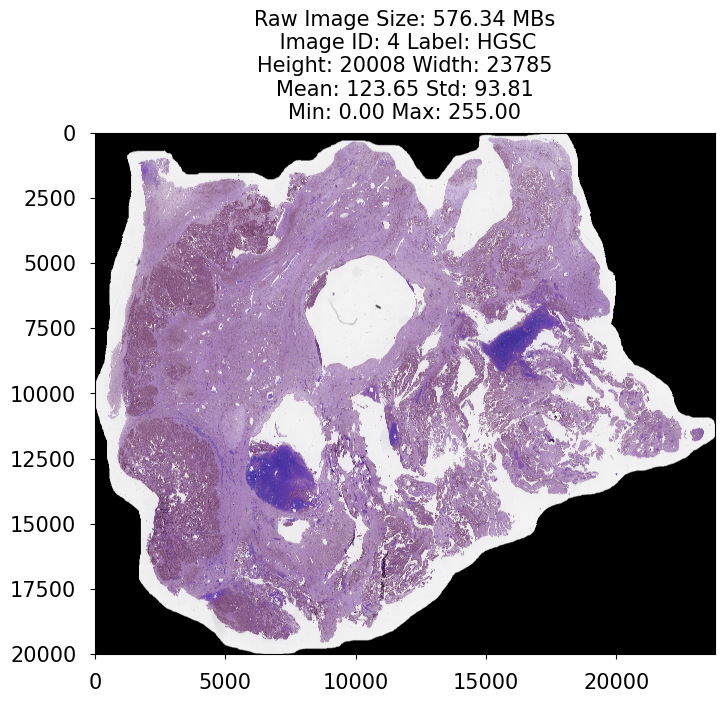

In [6]:
visualize_image(
    image=image,
    title=f'Raw Image Size: {raw_image_size:.2f} MBs\n Image ID: {first_row["image_id"]} Label: {first_row["label"]}\nHeight: {image.shape[0]} Width: {image.shape[1]}\nMean: {np.mean(image):.2f} Std: {np.std(image):.2f}\nMin: {np.min(image):.2f} Max: {np.max(image):.2f}'
)

100% JPEG compression reduces the image size from **576.34** to **280.37** MBs. Even though the compression quality is 100%, it is still lossy.

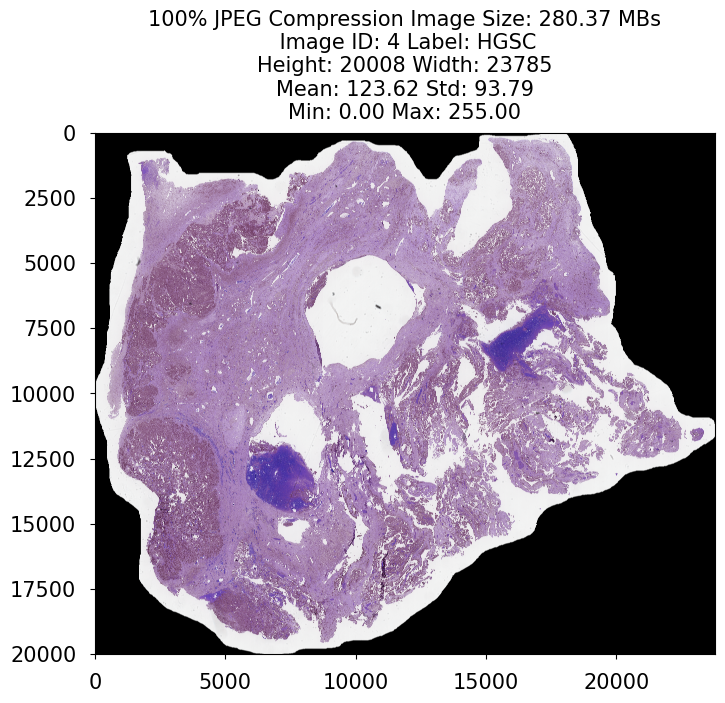

In [7]:
jpeg_quality = 100
cv2.imwrite('./4.jpg', image, [int(cv2.IMWRITE_JPEG_QUALITY), jpeg_quality])
compressed_image = cv2.imread('./4.jpg')
compressed_image_size = os.path.getsize('./4.jpg') / (1 << 20)

visualize_image(
    image=compressed_image,
    title=f'{jpeg_quality}% JPEG Compression Image Size: {compressed_image_size:.2f} MBs\n Image ID: {first_row["image_id"]} Label: {first_row["label"]}\nHeight: {compressed_image.shape[0]} Width: {compressed_image.shape[1]}\nMean: {np.mean(compressed_image):.2f} Std: {np.std(compressed_image):.2f}\nMin: {np.min(compressed_image):.2f} Max: {np.max(compressed_image):.2f}'
)

90% JPEG compression reduces the image size from **576.34** to **114.36** MBs. Decreasing the compression quality by 10% reduces the image size a lot.

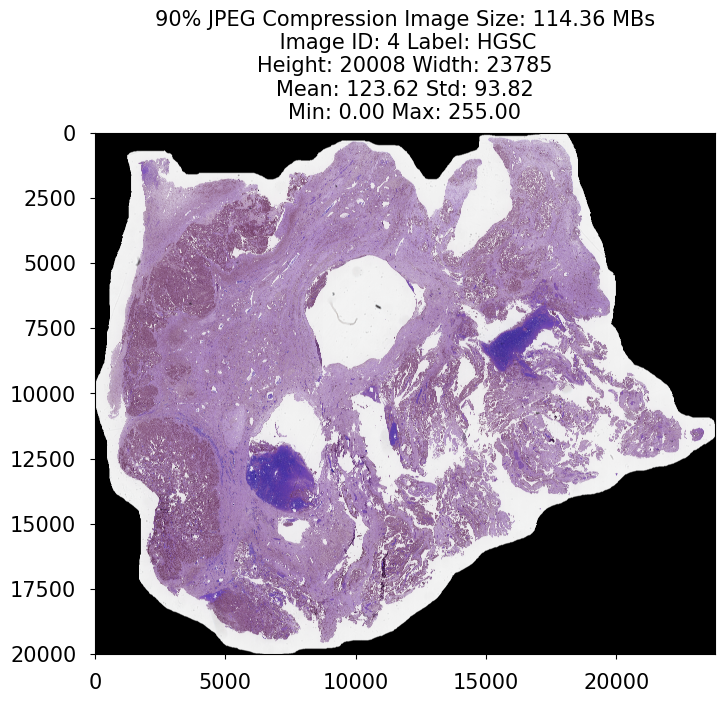

In [8]:
jpeg_quality = 90
cv2.imwrite('./4.jpg', image, [int(cv2.IMWRITE_JPEG_QUALITY), jpeg_quality])
compressed_image = cv2.imread('./4.jpg')
compressed_image_size = os.path.getsize('./4.jpg') / (1 << 20)

visualize_image(
    image=compressed_image,
    title=f'{jpeg_quality}% JPEG Compression Image Size: {compressed_image_size:.2f} MBs\n Image ID: {first_row["image_id"]} Label: {first_row["label"]}\nHeight: {compressed_image.shape[0]} Width: {compressed_image.shape[1]}\nMean: {np.mean(compressed_image):.2f} Std: {np.std(compressed_image):.2f}\nMin: {np.min(compressed_image):.2f} Max: {np.max(compressed_image):.2f}'
)

80% JPEG compression reduces the image size from **576.34** to **87.35** MBs. Benefit gain from decreasing the compression quality is starting to diminish at this point. 80% compression quality could be optimal.

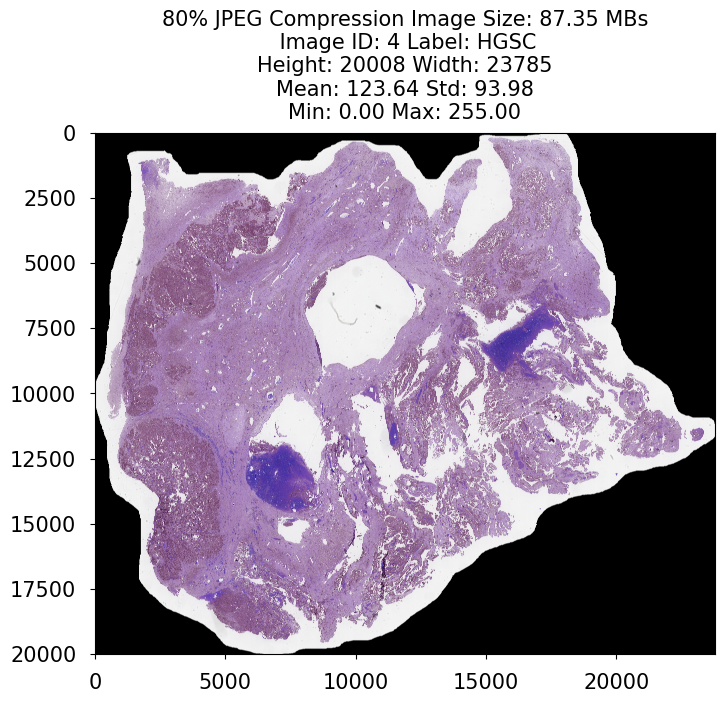

In [9]:
jpeg_quality = 80
cv2.imwrite('./4.jpg', image, [int(cv2.IMWRITE_JPEG_QUALITY), jpeg_quality])
compressed_image = cv2.imread('./4.jpg')
compressed_image_size = os.path.getsize('./4.jpg') / (1 << 20)

visualize_image(
    image=compressed_image,
    title=f'{jpeg_quality}% JPEG Compression Image Size: {compressed_image_size:.2f} MBs\n Image ID: {first_row["image_id"]} Label: {first_row["label"]}\nHeight: {compressed_image.shape[0]} Width: {compressed_image.shape[1]}\nMean: {np.mean(compressed_image):.2f} Std: {np.std(compressed_image):.2f}\nMin: {np.min(compressed_image):.2f} Max: {np.max(compressed_image):.2f}'
)

In [10]:
del image, compressed_image

## 4. Dataset Pipeline

This is the dataset pipeline where all of the images are compressed and saved to disk. Image sizes can be reduced further by resizing them. Images are not perfect squares so they have to be resized while preserving their aspect ratios. That operation prevents any distortion. 

In [11]:
def resize_with_aspect_ratio(image, longest_edge):

    """
    Resize image while preserving its aspect ratio

    Parameters
    ----------
    image: numpy.ndarray of shape (height, width, 3)
        Image array

    longest_edge: int
        Desired number of pixels on the longest edge

    Returns
    -------
    image: numpy.ndarray of shape (resized_height, resized_width, 3)
        Resized image array
    """

    height, width = image.shape[:2]
    scale = longest_edge / max(height, width)
    image = cv2.resize(image, dsize=(int(np.ceil(width * scale)), int(np.ceil(height * scale))), interpolation=cv2.INTER_AREA)

    return image


`MAX_SIZE` is set to `20000` pixels which is the highest value that an image can have as height and/or width. `JPEG_QUALITY` is set to `80` which is a reasonable rate of compression quality. Those two parameters can be tuned based on the need but they might be enough for modelling purposes at this point.

**This notebook uses the updated data with fixed masks.** 

In [12]:
MAX_SIZE = 20000
JPEG_QUALITY = 80

train_compressed_image_directory = Path('./train_compressed_images')
train_compressed_image_directory.mkdir(exist_ok=True, parents=True)

for idx, row in tqdm(df_train.iterrows(), total=df_train.shape[0]):
    
    raw_image_path = str(competition_dataset_directory / 'train_images' / f'{row["image_id"]}.png')
    compressed_image_path = str(train_compressed_image_directory / f'{row["image_id"]}.jpg')
    image_type = 'TMA' if row['is_tma'] else 'WSI' 
    
    image = cv2.imread(raw_image_path)
    
    raw_image_shape = image.shape[:2]
    longest_edge = max(raw_image_shape)
    if longest_edge > MAX_SIZE:
        image = resize_with_aspect_ratio(image=image, longest_edge=MAX_SIZE)
    resized_image_shape = image.shape[:2]

    cv2.imwrite(compressed_image_path, image, [int(cv2.IMWRITE_JPEG_QUALITY), JPEG_QUALITY])

    raw_image_size = os.path.getsize(raw_image_path) / (1 << 20)
    compressed_image_size = os.path.getsize(compressed_image_path) / (1 << 20)
    print(f'Image ID: {row["image_id"]} Type: {image_type} Shape: {raw_image_shape[0]}x{raw_image_shape[1]} -> {resized_image_shape[0]}x{resized_image_shape[1]} Size: {raw_image_size:.2f} -> {compressed_image_size:.2f} MBs')

test_compressed_image_directory = Path('./test_compressed_images')
test_compressed_image_directory.mkdir(exist_ok=True, parents=True)

for idx, row in tqdm(df_test.iterrows(), total=df_test.shape[0]):
    
    raw_image_path = str(competition_dataset_directory / 'test_images' / f'{row["image_id"]}.png')
    compressed_image_path = str(test_compressed_image_directory / f'{row["image_id"]}.jpg')
    
    image = cv2.imread(raw_image_path)
    
    raw_image_shape = image.shape[:2]
    longest_edge = max(raw_image_shape)
    if longest_edge > MAX_SIZE:
        image = resize_with_aspect_ratio(image=image, longest_edge=MAX_SIZE)
    resized_image_shape = image.shape[:2]

    cv2.imwrite(compressed_image_path, image, [int(cv2.IMWRITE_JPEG_QUALITY), JPEG_QUALITY])

    raw_image_size = os.path.getsize(raw_image_path) / (1 << 20)
    compressed_image_size = os.path.getsize(compressed_image_path) / (1 << 20)
    print(f'Image ID: {row["image_id"]} Shape: {raw_image_shape[0]}x{raw_image_shape[1]} -> {resized_image_shape[0]}x{resized_image_shape[1]} Size: {raw_image_size:.2f} -> {compressed_image_size:.2f} MBs')


  0%|          | 0/538 [00:00<?, ?it/s]

Image ID: 4 Type: WSI Shape: 20008x23785 -> 16825x20000 Size: 576.34 -> 51.95 MBs
Image ID: 66 Type: WSI Shape: 48195x48871 -> 19724x20000 Size: 2712.86 -> 62.03 MBs
Image ID: 91 Type: TMA Shape: 3388x3388 -> 3388x3388 Size: 17.48 -> 1.72 MBs
Image ID: 281 Type: WSI Shape: 15545x42309 -> 7349x20000 Size: 363.37 -> 12.31 MBs
Image ID: 286 Type: WSI Shape: 30020x37204 -> 16139x20000 Size: 996.41 -> 38.37 MBs
Image ID: 431 Type: WSI Shape: 40943x39991 -> 20000x19535 Size: 1649.99 -> 53.34 MBs
Image ID: 706 Type: WSI Shape: 25965x75606 -> 6869x20000 Size: 1261.31 -> 11.97 MBs
Image ID: 970 Type: WSI Shape: 18935x32131 -> 11787x20000 Size: 739.61 -> 40.89 MBs
Image ID: 1020 Type: WSI Shape: 33751x36585 -> 18451x20000 Size: 1221.68 -> 50.10 MBs
Image ID: 1080 Type: WSI Shape: 23200x31336 -> 14808x20000 Size: 747.34 -> 42.80 MBs
Image ID: 1101 Type: WSI Shape: 18403x26306 -> 13992x20000 Size: 548.08 -> 43.89 MBs
Image ID: 1252 Type: WSI Shape: 27480x60420 -> 9097x20000 Size: 589.41 -> 10.35 M

  0%|          | 0/1 [00:00<?, ?it/s]

Image ID: 41 Shape: 16987x28469 -> 11934x20000 Size: 620.29 -> 44.62 MBs
